In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
import skimage.color as color
import skimage.segmentation as seg

In [2]:
# Function to fill image segments with white. The edge size is the pixel width of the edges.
def fill_segments_white(image, edge_size):
    
    # Start by copying the image
    image_white = np.copy(image)
    
    # Calculate image dimensions
    x_size = image.shape[0]
    y_size = image.shape[1]
    
    for x_coord in range(x_size):
        
        # Check if x coordinate is on the edge of the image
        if image_edge_coordinate(x_coord, x_size, edge_size):
            continue
        
        for y_coord in range(y_size):
            
            # Check if the y coordinate is on the edge of the image
            if image_edge_coordinate(y_coord, y_size, edge_size):
                continue
            
            # If the pixel is not on the edge of a segment, make it white
            if segment_center_coordinate(image, x_coord, y_coord, edge_size):
                
                image_white[x_coord, y_coord] = (255,255,255)
                
    return image_white

In [3]:
# Calculate whether a certain coordinate is on the outer edge of an image
def image_edge_coordinate(coord, axis_size, edge_size):
    
    if coord <= edge_size:
        
        return True
    
    elif coord >= axis_size - edge_size - 1:
        
        return True
    
    else:
        
        return False

In [4]:
# Calculate whether a pixel is in the center of a colour segment
def segment_center_coordinate(image, x_coord, y_coord, edge_size):
    
    # Retrieve the color of the pixel
    pixel_color = image[x_coord, y_coord]
    
    # Retrieve the surrounding colors
    color_left = image[x_coord - edge_size, y_coord]
    color_right = image[x_coord + edge_size, y_coord]
    color_down = image[x_coord, y_coord - edge_size]
    color_up = image[x_coord, y_coord + edge_size]
    
    # If all surrounding pixels are of the same color, return true
    if (np.array_equal(pixel_color,color_left) and np.array_equal(pixel_color,color_right)
        and np.array_equal(pixel_color,color_down) and np.array_equal(pixel_color,color_up)):
        return True
    else:
        return False

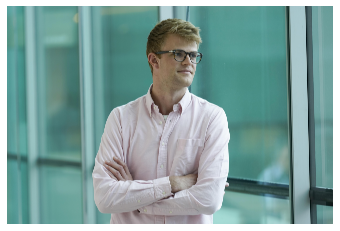

In [5]:
# Read the image you want to process
image = io.imread('image.png')

# Show the image
plt.axis('off')
plt.imshow(image)

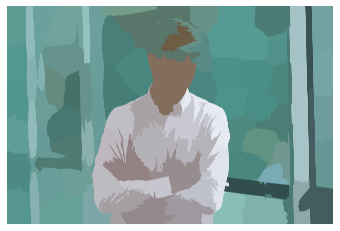

In [11]:
# Use simple linear iterative clustering (type of k-means) to construct segmented image
image_slic_result = seg.slic(image, n_segments = 100,
                             compactness = 10.0, max_iter = 30, start_label = 1)

# Take the average color of the regions
image_avg = color.label2rgb(image_slic_result, image, kind='avg', bg_label = 0)

# Display the image
plt.axis('off')
plt.imshow(image_avg)

In [7]:
# Make the inner part of each image segment white
edge_width_in_pixels = 10
color_book_image = fill_segments_white(image_avg, edge_width_in_pixels)

# Save the image
io.imsave('colorbook.png', color_book_image)

# Display the image
plt.axis('off')
plt.imshow(color_book_image)

KeyboardInterrupt: 